In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/data.csv


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
import warnings

In [42]:
dataset = pd.read_csv("/kaggle/input/breast-cancer-dataset/data.csv")
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
print(dataset.shape)

(569, 32)


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [46]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

**preprocessing**

In [47]:
dataset['diagnosis']=dataset['diagnosis'].apply(lambda x:'1' if x=='M' else '0')
dataset=dataset.set_index('id')


In [49]:
print(dataset.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


In [53]:
Y=dataset['diagnosis'].values
X=dataset.drop('diagnosis',axis=1).values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [55]:
print("training : ",len(X_train)," ",len(Y_train))
print("testing : ",len(X_test)," ",len(Y_test))

training :  455   455
testing :  114   114


In [58]:
mList=list()
mList.append(('CART',DecisionTreeClassifier()))
mList.append(('NB',GaussianNB()))
mList.append(('KNN',KNeighborsClassifier()))

In [63]:
nf = 10
result = []
names = [] 
for name, model in mList:
    kfold = KFold(n_splits=nf, shuffle=True, random_state=123)
    start = time.time()
    cresult = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    result.append(cresult)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" % (name, cresult.mean(), cresult.std(), end - start))


CART: 0.934010 (0.031027) (run time: 0.094543)
NB: 0.940531 (0.031603) (run time: 0.024364)
KNN: 0.922947 (0.038805) (run time: 0.126455)


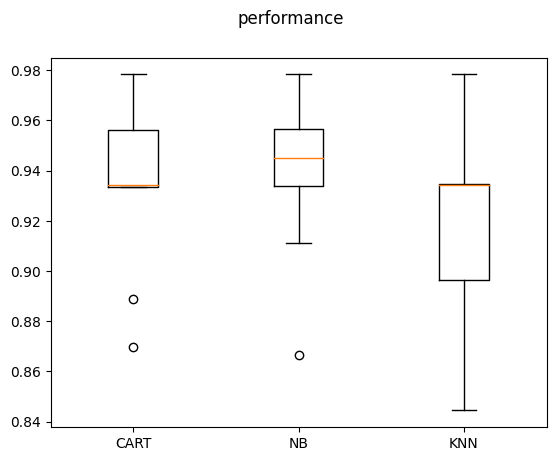

In [67]:
f = plt.figure()
f.suptitle('performance')
xx = f.add_subplot(111)
plt.boxplot(result)
xx.set_xticklabels(names)
plt.show()

Evaluation of algorithm on standardised data

In [71]:
import warnings

ppl = []

ppl.append(('ScaledCART', Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])))
ppl.append(('ScaledNB', Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])))
ppl.append(('ScaledKNN', Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])))

res=[]
names=[]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold=KFold(n_splits=nf,shuffle=True,random_state=123)
    for name,model in ppl:
        start = time.time()
        cr=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
        end=time.time()
        res.append(cr)
        names.append(name)
        print("%s : %f [%f] [run time: %f]"%(name,cr.mean(),cr.std(),end-start))


ScaledCART : 0.925217 [0.029744] [run time: 0.112648]
ScaledNB : 0.929565 [0.038096] [run time: 0.038720]
ScaledKNN : 0.949469 [0.027808] [run time: 0.388312]


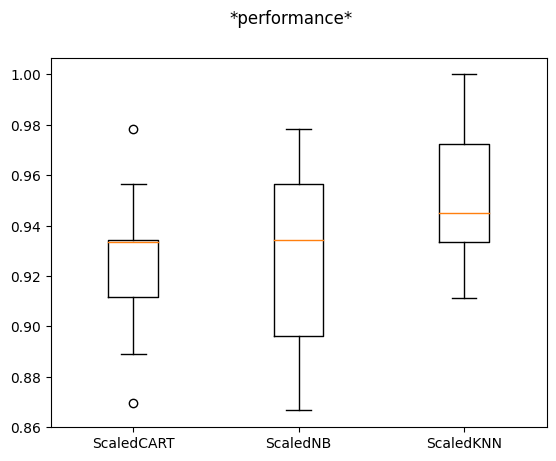

In [75]:
f= plt.figure()
f.suptitle('*performance*')
ax = f.add_subplot(111)
plt.boxplot(res)
ax.set_xticklabels(names)
plt.show()


In [76]:
scaler=StandardScaler().fit(X_train)
rescaledx=scaler.transform(X_train)
c_values = [0.1,0.3,0.5,0.7,0.9,1.0,1.2,1.5,1.5,2.0]
kernval=['linear','poly','rbf','sigmoid']
pmGrid=dict(C=c_values,kernel=kernval)
model=SVC()
kfold=KFold(n_splits=nf,shuffle=True,random_state=21)
grid=GridSearchCV(estimator=model,param_grid=pmGrid,scoring='accuracy',cv=kfold)
gdResult=grid.fit(rescaledx,Y_train)
print("Best: %f using %s "%(gdResult.best_score_,gdResult.best_params_))
mns = gdResult.cv_results_['mean_test_score']
stds=gdResult.cv_results_['std_test_score']
prms=gdResult.cv_results_['params']
for mean,stdev,pms in zip(mns,stds,prms):
    print("%f [%f] with : %r "%(mean,stdev,pms))

Best: 0.969130 using {'C': 1.5, 'kernel': 'rbf'} 
0.966908 [0.022890] with : {'C': 0.1, 'kernel': 'linear'} 
0.828502 [0.050827] with : {'C': 0.1, 'kernel': 'poly'} 
0.942850 [0.032841] with : {'C': 0.1, 'kernel': 'rbf'} 
0.953768 [0.028890] with : {'C': 0.1, 'kernel': 'sigmoid'} 
0.964686 [0.017960] with : {'C': 0.3, 'kernel': 'linear'} 
0.865845 [0.032091] with : {'C': 0.3, 'kernel': 'poly'} 
0.953816 [0.026855] with : {'C': 0.3, 'kernel': 'rbf'} 
0.956039 [0.031363] with : {'C': 0.3, 'kernel': 'sigmoid'} 
0.962512 [0.017495] with : {'C': 0.5, 'kernel': 'linear'} 
0.878986 [0.030482] with : {'C': 0.5, 'kernel': 'poly'} 
0.962560 [0.026103] with : {'C': 0.5, 'kernel': 'rbf'} 
0.953816 [0.033601] with : {'C': 0.5, 'kernel': 'sigmoid'} 
0.964686 [0.017960] with : {'C': 0.7, 'kernel': 'linear'} 
0.890048 [0.031450] with : {'C': 0.7, 'kernel': 'poly'} 
0.962609 [0.027882] with : {'C': 0.7, 'kernel': 'rbf'} 
0.951546 [0.036945] with : {'C': 0.7, 'kernel': 'sigmoid'} 
0.964734 [0.017877] wi

most accuracy with svm (RBF kernal) as 96.6232%


In [78]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scal = StandardScaler().fit(X_train)
X_train_scaled=scal.transform(X_train)
model=SVC(C=2.1,kernel='rbf')
start=time.time()
model.fit(X_train_scaled,Y_train)
end=time.time()

print(end-start)

0.004800081253051758


In [79]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [81]:
print("accuracy score %f  "%accuracy_score(Y_test,predictions))
print(classification_report(Y_test,predictions))

accuracy score 0.991228  
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.97      1.00      0.99        39

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [82]:
print(confusion_matrix(Y_test,predictions))

[[74  1]
 [ 0 39]]
